<a href="https://colab.research.google.com/github/jujhaar2409/unClear/blob/master/assignments/MNIST_num_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST numbers recognition

## Importing some packages that we will be using

In [2]:
import tensorflow as tf
import os
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data

### Getting raw data from google  drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')
testdf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
traindf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

Mounted at /content/drive


### Formatting data correctly

The data must be in the correct shape(ie, no. of items, 28, 28, 1) and must be normalized so that each pixel value lies between 0 and 1.

In [24]:
y_train = np.array(traindf.iloc[:, 0].values)

x_train = np.array(traindf.iloc[:, 1:].values)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_train_normalized = x_train / 255

x_test = np.array(testdf.iloc[:, :].values)
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
x_test_normalized = x_test / 255

## Defining and Training the model

### Definition of the model

In [77]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 21632)             0         
_________________________________________________________________
dense_78 (Dense)             (None, 128)               2769024   
_________________________________________________________________
dense_79 (Dense)             (None, 10)                1290      
Total params: 2,771,594
Trainable params: 2,771,594
Non-trainable params: 0
___________________________________________

### Training the model

In [78]:
def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split, verbose=1)
  
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist 

learning_rate = 0.004
epochs = 25
batch_size = 300
validation_split = 0.1

epochs, hist = train_model(model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)
# epochs, hist = train_model(model, x_train_normalized, y_train, 
#                            epochs, validation_split=validation_split)


Epoch 1/25
126/126 [==============================] - 4s 30ms/step - loss: 0.6015 - accuracy: 0.8237 - val_loss: 0.1329 - val_accuracy: 0.9593
Epoch 2/25
126/126 [==============================] - 3s 28ms/step - loss: 0.1101 - accuracy: 0.9684 - val_loss: 0.0821 - val_accuracy: 0.9729
Epoch 3/25
126/126 [==============================] - 3s 28ms/step - loss: 0.0704 - accuracy: 0.9805 - val_loss: 0.0616 - val_accuracy: 0.9793
Epoch 4/25
126/126 [==============================] - 3s 28ms/step - loss: 0.0543 - accuracy: 0.9837 - val_loss: 0.0567 - val_accuracy: 0.9802
Epoch 5/25
126/126 [==============================] - 3s 28ms/step - loss: 0.0431 - accuracy: 0.9873 - val_loss: 0.0514 - val_accuracy: 0.9831
Epoch 6/25
126/126 [==============================] - 3s 28ms/step - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.0569 - val_accuracy: 0.9824
Epoch 7/25
126/126 [==============================] - 3s 28ms/step - loss: 0.0349 - accuracy: 0.9885 - val_loss: 0.0489 - val_accuracy: 0.9840

### Visualizing the results

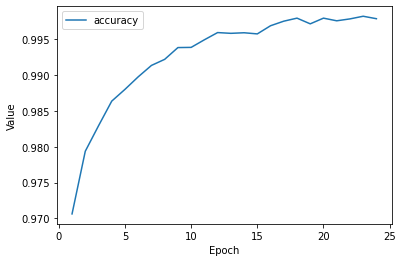

In [79]:
def plot_curve(epochs, hist, list_of_metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")
  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)
  plt.legend()
  
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

## Running our model on the test set

In [80]:
from google.colab import files

raw = model.predict(x_test_normalized)
predictions = list(map(np.argmax, raw))
print(predictions)
data = {
    "ImageId": [i for i in range(1, len(predictions) + 1)],
    "Label": predictions
}
df = pd.DataFrame(data, columns = ['ImageId','Label'])

df.to_csv('predictions.csv', index=False) 
files.download('predictions.csv')

# accuracy of 98.57 on the test set given by kaggle: https://www.kaggle.com/c/digit-recognizer/

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1, 5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7, 8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 9, 9, 2, 3, 5, 4, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4, 0, 9, 2, 0, 7, 3, 0, 5, 0, 8, 0, 0, 4, 7, 1, 7, 1, 1, 3, 3, 3, 7, 2, 8, 6, 3, 8, 7, 8, 4, 3, 5, 6, 0, 0, 0, 3, 1, 3, 6, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6, 5, 3, 7, 5, 7, 8, 3, 0, 4, 5, 1, 3, 7, 6, 3, 0, 2, 7, 8, 6, 1, 3, 7, 4, 1, 2, 4, 8, 5, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7, 6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 3, 2, 1, 6, 3, 4, 2, 3, 1, 2, 2, 0, 4, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 3, 8, 6, 8, 6, 2, 8, 5, 5, 4, 8, 3, 5, 9, 7, 1, 3, 8, 4, 5, 1, 4, 5, 6, 3, 3, 5, 7, 0, 6, 8, 3, 1, 6, 0, 6, 3, 9, 3, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3, 7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6, 9, 8, 2, 6, 3, 7, 1, 4, 5, 8, 5, 9, 0, 0, 3, 8, 4, 1, 8, 4, 1, 1, 9, 8, 4, 5, 1, 5, 3, 6, 3, 1, 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>